<a href="https://colab.research.google.com/github/Almas-21321012/cardiohealth/blob/main/business_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cardiovascular Health Analysis Report

The purpose of this report is to analyze a cardiovascular health dataset to uncover insights related to demographic, clinical, and lifestyle factors contributing to cardiovascular disease. We will perform data extraction, cleaning, analysis, and visualization using Python.


## Set Up the Environment

### Import Libraries

- sqlite3 (to connect to the database)
- pandas (for data manipulation)
- numpy (for numerical operations)
- matplotlib (for visualization)

In [14]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Extract Data from SQLite Database
- Connect to the cardiohealth.db SQLite database.
- Query the data from the medical_examination table.

In [15]:
# Connect to the SQLite database
db_path = '/content/cardiohealth.db'
conn = sqlite3.connect(db_path)

In [16]:
# Function to load data from SQL into a Pandas DataFrame
def load_data(query, conn):
    return pd.read_sql(query, conn)

## Access the Database

In [18]:
# Get the list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = load_data(tables_query, conn)
print(tables)

                  name
0  medical_examination


In [21]:
# Show the schema of the table (assuming the table is named 'medical_examination')
table_name = 'medical_examination'
schema_query = f"PRAGMA table_info({table_name});"
schema = load_data(schema_query, conn)
print(schema)

    cid         name     type  notnull dflt_value  pk
0     0           id  INTEGER        0       None   0
1     1          age  INTEGER        0       None   0
2     2       gender  INTEGER        0       None   0
3     3       height  INTEGER        0       None   0
4     4       weight     REAL        0       None   0
5     5        ap_hi  INTEGER        0       None   0
6     6        ap_lo  INTEGER        0       None   0
7     7  cholesterol  INTEGER        0       None   0
8     8         gluc  INTEGER        0       None   0
9     9        smoke  INTEGER        0       None   0
10   10         alco  INTEGER        0       None   0
11   11       active  INTEGER        0       None   0
12   12       cardio  INTEGER        0       None   0


## Data Extraction and Manipulation

In [22]:
# Extract the necessary data from the database
data_query = f"SELECT * FROM {table_name};"
df = load_data(data_query, conn)

# Display the first few rows of the data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Exploration
In this step, we explore the structure of the dataset, inspect the columns, check for missing values, and get an overview of the data using summary statistics.


In [23]:
# Check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [24]:
# Convert age from days to years for better readability
df['age_years'] = df['age'] // 365

In [25]:
# Check for missing values
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64


In [26]:
# If necessary, you can drop or fill missing values (for demonstration, we'll drop any nulls)
df_clean = df.dropna()

In [27]:
# Display summary statistics of the dataset
print(df_clean.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

## Factor Combinations to Analyze
We need to analyze the combinations of demographic, clinical, and lifestyle factors. Below are some examples:

- One combination of a Demographic factor and a Lifestyle factor.
- One combination of a Demographic factor and a Clinical factor.
- Two combinations of Demographic, Clinical, and Lifestyle factors.
# Example choices:

1. Demographic + Lifestyle: Gender + Smoking
2. Demographic + Clinical: Age + Cholesterol
3. Demographic, Clinical, and Lifestyle: Age + Blood Pressure + Physical Activity

### 1. Demographic Factor + Lifestyle Factor: Gender + Smoking


   gender  smoke    cardio
0       1      0  0.497103
1       1      1  0.477245
2       2      0  0.513893
3       2      1  0.474421
4       3      0  0.363636


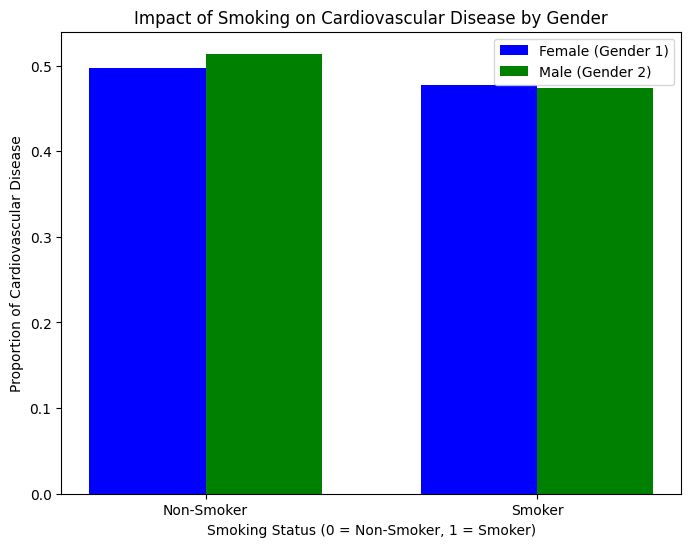

In [34]:
# Select relevant columns for Gender and Smoking analysis
df_gender_smoke = df[['gender', 'smoke', 'cardio']]

# Group the data by gender and smoking status and calculate the mean cardiovascular disease rate
grouped_data = df_gender_smoke.groupby(['gender', 'smoke'])['cardio'].mean().reset_index()

# Print the grouped data to inspect
print(grouped_data)

# Set up figure size
plt.figure(figsize=(8, 6))

# Set bar width and positions for grouped bars
bar_width = 0.35
index = np.arange(len(grouped_data['smoke'].unique()))  # Smoking status (0 or 1)

# Plot for each gender, adjusting positions to avoid overlap
gender_1_data = grouped_data[grouped_data['gender'] == 1]
gender_2_data = grouped_data[grouped_data['gender'] == 2]

plt.bar(index, gender_1_data['cardio'], bar_width, label='Female (Gender 1)', color='blue')
plt.bar(index + bar_width, gender_2_data['cardio'], bar_width, label='Male (Gender 2)', color='green')

# Add labels, title, and legend
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Proportion of Cardiovascular Disease')
plt.title('Impact of Smoking on Cardiovascular Disease by Gender')
plt.xticks(index + bar_width / 2, ['Non-Smoker', 'Smoker'])  # Labels for smoking status
plt.legend()

# Show the plot
plt.show()


## 2. Demographic Factor + Clinical Factor: Age Group + Cholesterol


<ipython-input-29-6fa3f4f36562>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cholesterol = df_clean.groupby(['age_group', 'cholesterol'])['cardio'].mean().reset_index()


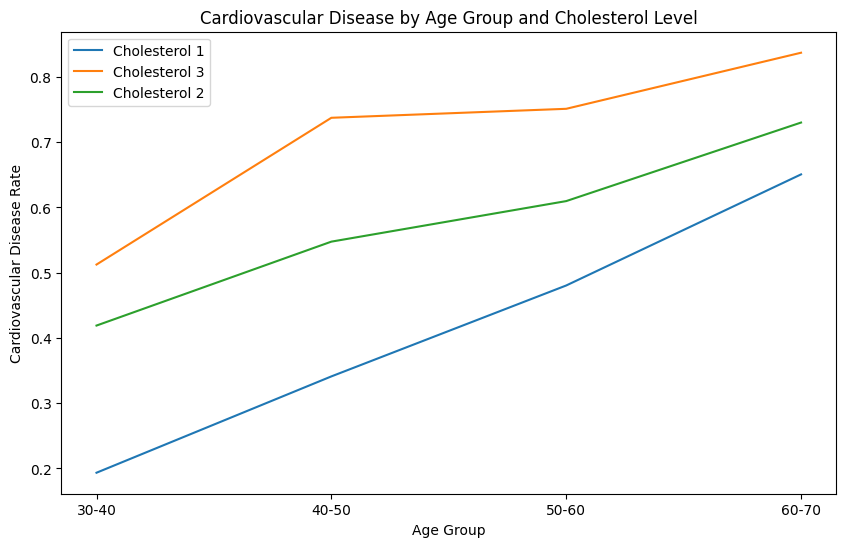

In [29]:
# Group age into bins (age groups)
df_clean['age_group'] = pd.cut(df_clean['age_years'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Analyze the combination of Age Group and Cholesterol
age_cholesterol = df_clean.groupby(['age_group', 'cholesterol'])['cardio'].mean().reset_index()

# Plot the relationship between Age Group, Cholesterol, and Cardiovascular Disease
plt.figure(figsize=(10,6))
for chol in df_clean['cholesterol'].unique():
    subset = age_cholesterol[age_cholesterol['cholesterol'] == chol]
    plt.plot(subset['age_group'], subset['cardio'], label=f'Cholesterol {chol}')
plt.title('Cardiovascular Disease by Age Group and Cholesterol Level')
plt.xlabel('Age Group')
plt.ylabel('Cardiovascular Disease Rate')
plt.legend()
plt.show()

## 3. Demographic + Clinical + Lifestyle Factors: Gender + Blood Pressure + Smoking


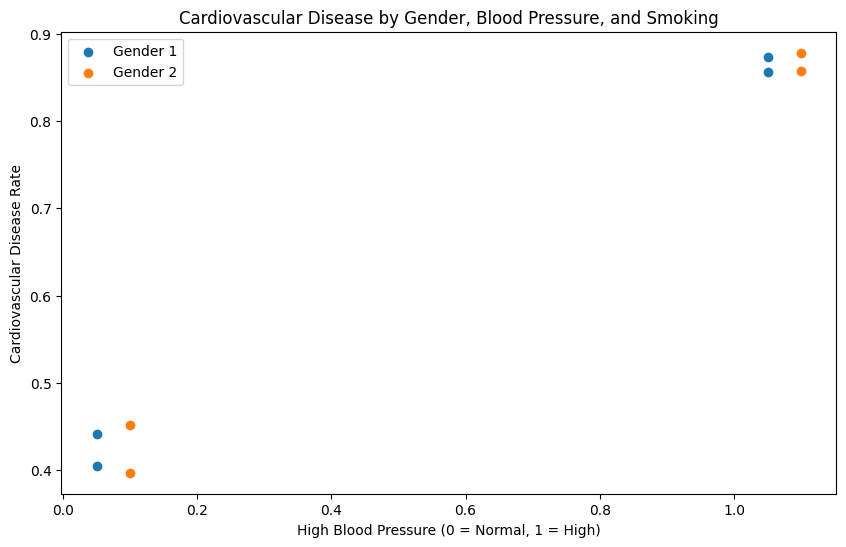

In [30]:
# Analyze the combination of Gender, Blood Pressure, and Smoking
df_clean['high_bp'] = np.where(df_clean['ap_hi'] > 140, 1, 0)  # Define high systolic BP
gender_bp_smoking = df_clean.groupby(['gender', 'high_bp', 'smoke'])['cardio'].mean().reset_index()

# Plot the relationship between Gender, Blood Pressure, Smoking, and Cardiovascular Disease
plt.figure(figsize=(10,6))
for gender in [1, 2]:
    subset = gender_bp_smoking[gender_bp_smoking['gender'] == gender]
    plt.scatter(subset['high_bp'] + 0.05 * gender, subset['cardio'], label=f'Gender {gender}')
plt.title('Cardiovascular Disease by Gender, Blood Pressure, and Smoking')
plt.xlabel('High Blood Pressure (0 = Normal, 1 = High)')
plt.ylabel('Cardiovascular Disease Rate')
plt.legend()
plt.show()